# Purpose of use data

Here we present a primary analysis of the data. Then, we delve into a more detailed analysis of the types of land-use. In the end, we format the data in order to use for a spider chart showing the different types of land-use.

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading and Preprocessing Data

In [33]:
# Load the JSON data
file_path = '../app/public/data/transactions_of_immovables_by_the_purpose_of_use_county_level.json'
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Flatten the JSON data into a DataFrame
rows = []
for county in data:
    county_code = county["MKOOD"]
    for year, records in county["data"].items():
        for record in records:
            if "Total area (ha)" in record and "Total value (eur)" in record:
                rows.append({
                    "County_code": county_code,
                    "Year": int(year),
                    "Land Type": record["Name"],
                    "Number of Transactions": record["Number"],
                    "Total Area (ha)": record["Total area (ha)"],
                    "Total Value (eur)": record["Total value (eur)"],
                })

# Convert to Pandas DataFrame
df = pd.DataFrame(rows)

In [34]:
df.head()

,County_code,Year,Land Type,Number of Transactions,Total Area (ha),Total Value (eur)
0,0037,2010,Residential land,3096,522,211097934
1,0037,2010,Profit yielding land,1042,9582,34264265
2,0037,2010,Other,416,298,25264992
3,0037,2010,Mixed land,174,362,79699305
4,0037,2010,Industrial land,234,179,53721525


In [35]:
# Load the codes-county mapping
county_path = '../app/public/data/id_to_county.json'
with open(county_path, "r", encoding="utf-8") as file:
    county_codes = json.load(file)

# Convert ids to names
df["County_name"] = df["County_code"].map(county_codes)

# Convert "Total Area (ha)" and "Total Value (eur)" to numeric, handling non-numeric values
df["Total Area (ha)"] = pd.to_numeric(df["Total Area (ha)"], errors="coerce")
df["Total Value (eur)"] = pd.to_numeric(df["Total Value (eur)"], errors="coerce")

In [36]:
df.head()

,County_code,Year,Land Type,Number of Transactions,Total Area (ha),Total Value (eur),County_name
0,0037,2010,Residential land,3096,522.0,211097934.0,Harju maakond
1,0037,2010,Profit yielding land,1042,9582.0,34264265.0,Harju maakond
2,0037,2010,Other,416,298.0,25264992.0,Harju maakond
3,0037,2010,Mixed land,174,362.0,79699305.0,Harju maakond
4,0037,2010,Industrial land,234,179.0,53721525.0,Harju maakond


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   County_code             1562 non-null   object 
 1   Year                    1562 non-null   int64  
 2   Land Type               1562 non-null   object 
 3   Number of Transactions  1562 non-null   int64  
 4   Total Area (ha)         1550 non-null   float64
 5   Total Value (eur)       1550 non-null   float64
 6   County_name             1562 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 85.5+ KB


In [38]:
print(df.isna().sum())
# Drop rows where both area and value are NaN (invalid data)
df.dropna(subset=["Total Area (ha)", "Total Value (eur)"], how="all", inplace=True)
print(df.isna().sum())

County_code                0
Year                       0
Land Type                  0
Number of Transactions     0
Total Area (ha)           12
Total Value (eur)         12
County_name                0
dtype: int64
County_code               0
Year                      0
Land Type                 0
Number of Transactions    0
Total Area (ha)           0
Total Value (eur)         0
County_name               0
dtype: int64


## First graphs analysis

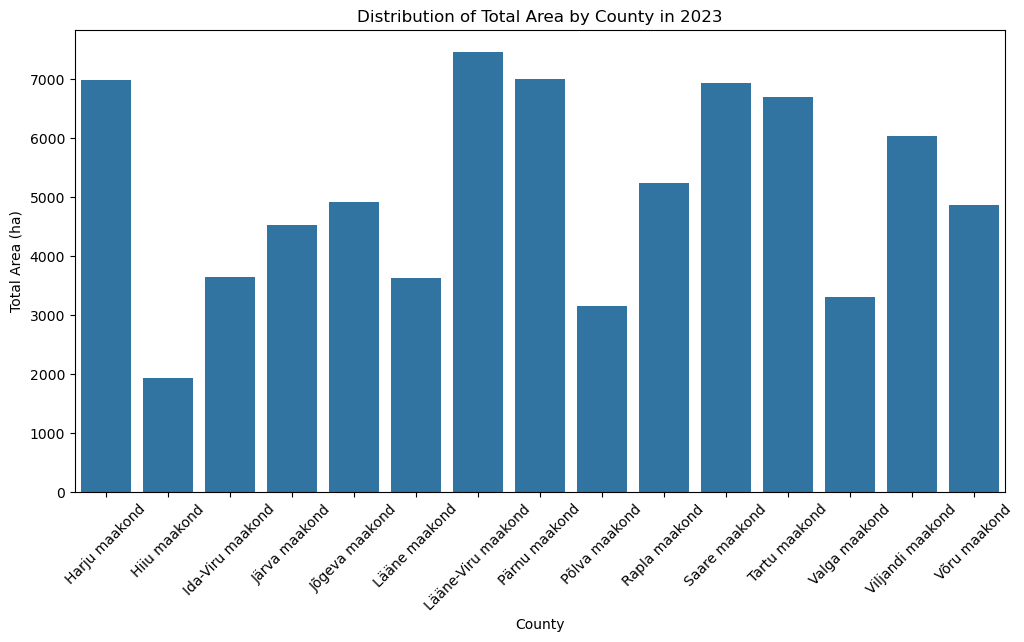

In [39]:
# Select a specific year
year_selected = 2023
df_year = df[df["Year"] == year_selected]
df_year = df_year[df_year["Land Type"] == "TOTAL"]

# Aggregate data by county
df_county = df_year.groupby("County_name").sum(numeric_only=True).reset_index()

# Distribution of total area per county
plt.figure(figsize=(12, 6))
sns.barplot(x=df_county["County_name"], y=df_county["Total Area (ha)"])
plt.xlabel("County")
plt.ylabel("Total Area (ha)")
plt.title(f"Distribution of Total Area by County in {year_selected}")
plt.xticks(rotation=45)
plt.show()


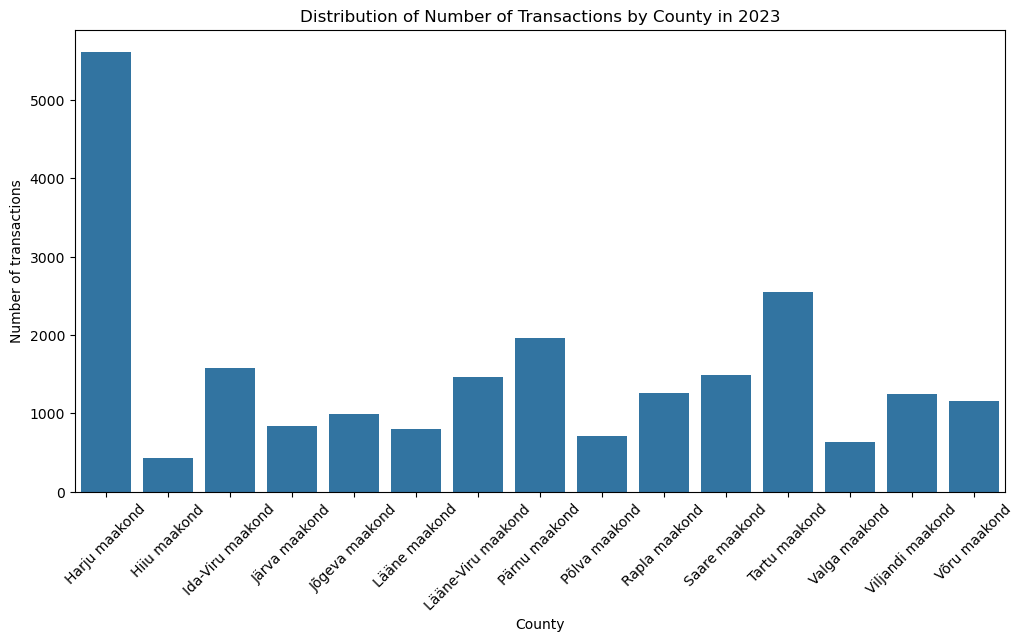

In [10]:
# Select a specific year
year_selected = 2023
df_year = df[df["Year"] == year_selected]
df_year = df_year[df_year["Land Type"] == "TOTAL"]

# Aggregate data by county
df_county = df_year.groupby("County").sum(numeric_only=True).reset_index()

# Distribution of total area per county
plt.figure(figsize=(12, 6))
sns.barplot(x=df_county["County"], y=df_county["Number of Transactions"])
plt.xlabel("County")
plt.ylabel("Number of transactions")
plt.title(f"Distribution of Number of Transactions by County in {year_selected}")
plt.xticks(rotation=45)
plt.show()


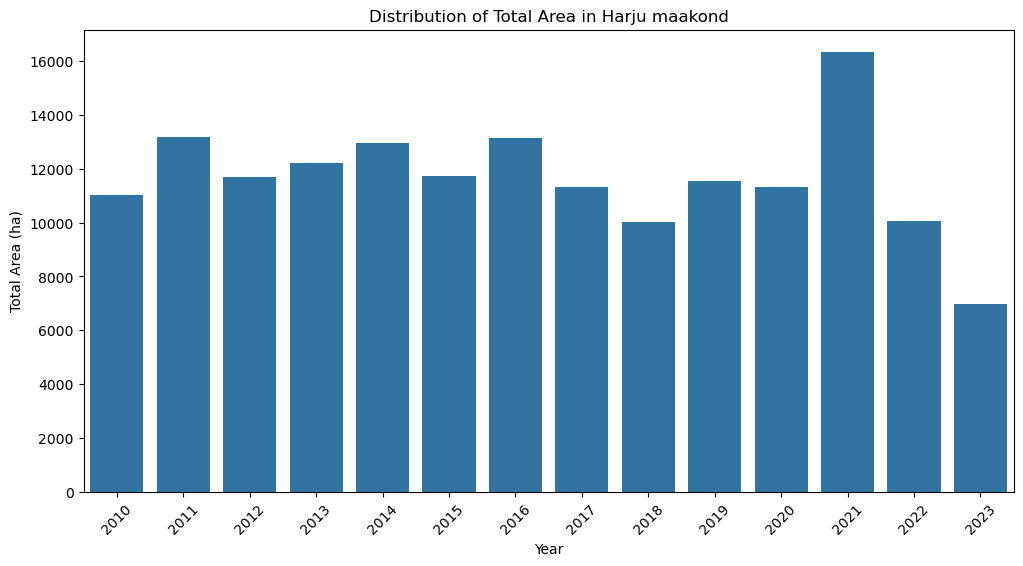

In [40]:
# Select a specific county
county_selected = "Harju maakond"
df_county = df[df["County_name"] == county_selected]
df_county = df_county[df_county["Land Type"] == "TOTAL"]

# Distribution of total area per year
plt.figure(figsize=(12, 6))
sns.barplot(x=df_county["Year"], y=df_county["Total Area (ha)"], legend=False, errorbar=None)
plt.xlabel("Year")
plt.ylabel("Total Area (ha)")
plt.title(f"Distribution of Total Area in {county_selected}")
plt.xticks(rotation=45)
plt.show()

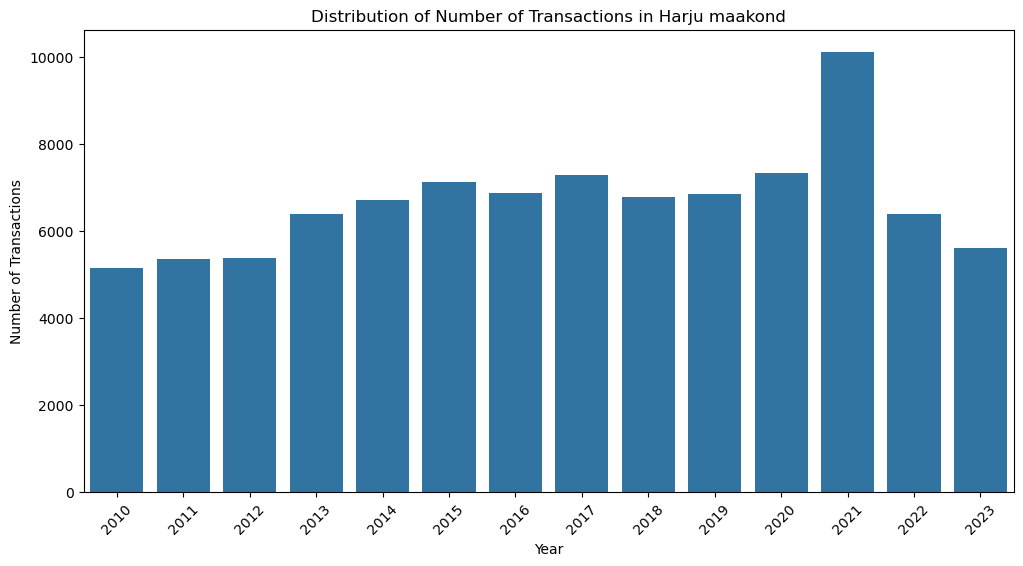

In [41]:
# Select a specific county
county_selected = "Harju maakond"
df_county = df[df["County_name"] == county_selected]
df_county = df_county[df_county["Land Type"] == "TOTAL"]

# Distribution of total area per year
plt.figure(figsize=(12, 6))
sns.barplot(x=df_county["Year"], y=df_county["Number of Transactions"], legend=False, errorbar=None)
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.title(f"Distribution of Number of Transactions in {county_selected}")
plt.xticks(rotation=45)
plt.show()

## Type of lands

In [ ]:
print(f"Types of land: {df["Land Type"].unique()}")
# Remove the TOTAL column because it is non of our interet for the spider chart
df_spider = df.drop(df[df["Land Type"] == "TOTAL"].index)
# Keep only interesting columns
df_spider = df_spider[["County_code", "Year", "Land Type", "Total Area (ha)"]].reset_index(drop=True)
df_spider

,County_code,Year,Land Type,Total Area (ha)
0,0037,2010,Residential land,522.0
1,0037,2010,Profit yielding land,9582.0
2,0037,2010,Other,298.0
3,0037,2010,Mixed land,362.0
4,0037,2010,Industrial land,179.0
...,...,...,...,...
1335,0087,2024,Profit yielding land,5804.0
1336,0087,2024,Other,65.0
1337,0087,2024,Mixed land,143.0
1338,0087,2024,Industrial land,40.0


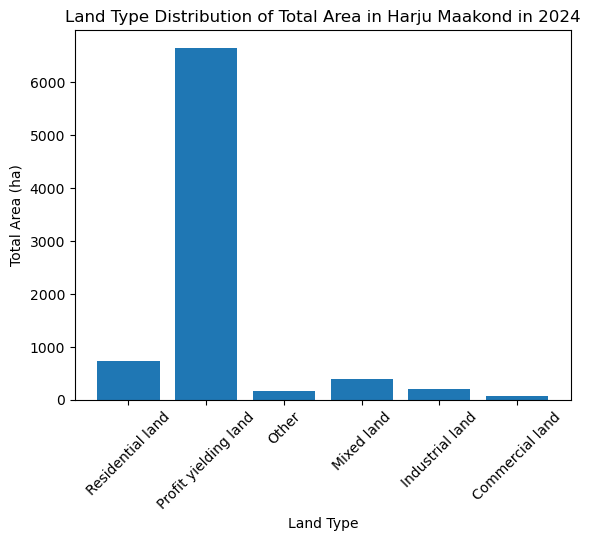

In [ ]:
df_spider_county_year = df_spider[(df_spider["County_code"]== "0037") & (df_spider["Year"]== 2023)]

plt.bar(x=df_spider_county_year["Land Type"], height=df_spider_county_year["Total Area (ha)"])
plt.xlabel("Land Type")
plt.ylabel("Total Area (ha)")
plt.title(f"Land Type Distribution of Total Area in Harju Maakond in 2024")
plt.xticks(rotation=45)
plt.show()

## Spider chart formatting

As we can see here, the profit yielding land far exceeds the others. To have comparable values for our spider chart, we normalize the data doing the following:

- Within a year, we take the sum of the total area for each land type
- We divide each value by its corresponding sum, normalizing it within a year

In [45]:
total_area_per_landtype_year = df_spider.groupby(["Year", "Land Type"])["Total Area (ha)"].transform('sum')
df_spider["Normalized Area"] = round(df_spider["Total Area (ha)"] / total_area_per_landtype_year * 100, 2)
df_spider.head()

,County_code,Year,Land Type,Total Area (ha),Normalized Area
0,0037,2010,Residential land,522.0,23.05
1,0037,2010,Profit yielding land,9582.0,8.99
2,0037,2010,Other,298.0,22.03
3,0037,2010,Mixed land,362.0,18.18
4,0037,2010,Industrial land,179.0,18.42


In [ ]:
# We export the data in the correct format

json_output = []

# Group by County_code
for county, group in df_spider.groupby("County_code"):
    county_dict = {
        "MKOOD": county,  # Directly using County_code as MKOOD
        "data": {}
    }

    # Group by Year within each County
    for year, year_group in group.groupby("Year"):
        county_dict["data"][str(year)] = [
            {
                "Name": row["Land Type"],
                "Normalized Area": row["Normalized Area"]
            }
            for _, row in year_group.iterrows()
        ]

    json_output.append(county_dict)

with open("normalized_spider_data.json", "w", encoding="utf-8") as f:
    json.dump(json_output, f, indent=4)